<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/12_Regression_%26_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

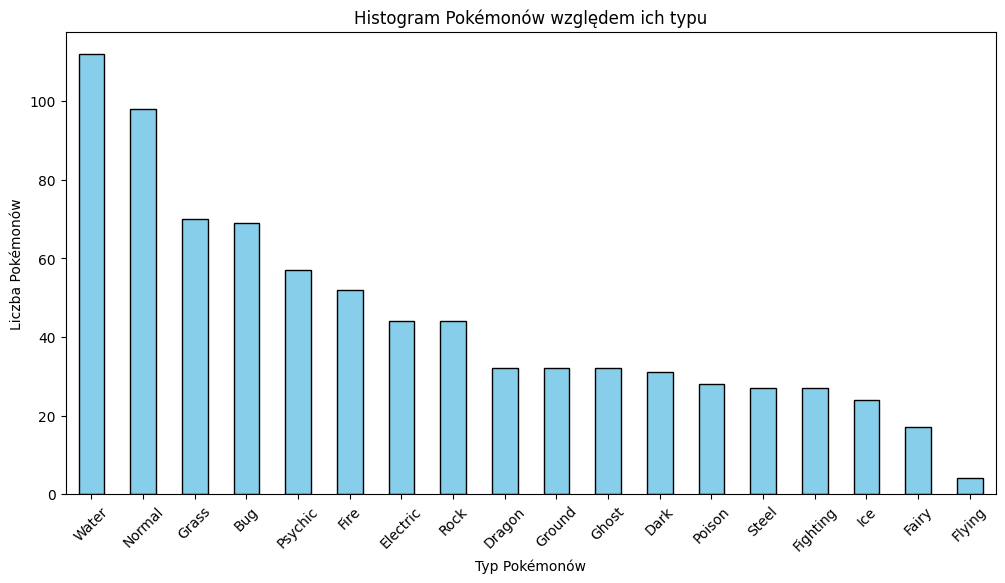

5 największych różnic między atakiem i obroną:
                   Name  Attack  Defense  Attack-Defense Diff
230             Shuckle      10      230                  220
429  DeoxysAttack Forme     180       20                  160
456           Bastiodon      52      168                  116
103                Onix      45      160                  115
223             Steelix      85      200                  115

5 najmniejszych różnic między atakiem i obroną:
          Name  Attack  Defense  Attack-Defense Diff
251    Donphan     120      120                    0
255    Tyrogue      35       35                    0
256  Hitmontop      95       95                    0
261    Blissey      10       10                    0
0    Bulbasaur      49       49                    0
Największa średnia wartość ataku: Dragon
Najmniejsza średnia wartość ataku: Fairy
Największa średnia wartość obrony: Steel
Najmniejsza średnia wartość obrony: Normal


In [ ]:
# Ponowne wczytanie pliku po resecie stanu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wczytanie pliku Pokémonów
file_path = "Pokemon.csv"
df = pd.read_csv(file_path)

# 1️⃣ Narysuj histogram Pokémonów względem typów (Type 1)
plt.figure(figsize=(12,6))
df["Type 1"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Typ Pokémonów")
plt.ylabel("Liczba Pokémonów")
plt.title("Histogram Pokémonów względem ich typu")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Znajdź 5 Pokémonów z największą i najmniejszą różnicą między atakiem a obroną
df["Attack-Defense Diff"] = abs(df["Attack"] - df["Defense"])

# Sortowanie według różnicy
df_sorted = df.sort_values(by="Attack-Defense Diff", ascending=False)

# Wybranie 5 największych i 5 najmniejszych różnic
top_5_attack_defense_diff = df_sorted.head(5)[["Name", "Attack", "Defense", "Attack-Defense Diff"]]
bottom_5_attack_defense_diff = df_sorted.tail(5)[["Name", "Attack", "Defense", "Attack-Defense Diff"]]

# Wyświetlenie wyników
print(f"5 największych różnic między atakiem i obroną:\n{top_5_attack_defense_diff}\n")
print(f"5 najmniejszych różnic między atakiem i obroną:\n{bottom_5_attack_defense_diff}")

# 3️⃣ Znajdź typ Pokémonów z największym i najmniejszym średnim atakiem oraz obroną
avg_attack_per_type = df.groupby("Type 1")["Attack"].mean()
avg_defense_per_type = df.groupby("Type 1")["Defense"].mean()

print(f"Największa średnia wartość ataku: {avg_attack_per_type.idxmax()}")
print(f"Najmniejsza średnia wartość ataku: {avg_attack_per_type.idxmin()}")
print(f"Największa średnia wartość obrony: {avg_defense_per_type.idxmax()}")
print(f"Najmniejsza średnia wartość obrony: {avg_defense_per_type.idxmin()}")

In [ ]:
#wyliczanie średniej

list_of_numbers = [6, 10, 3, 7, 12]

def calculate_mean(list_of_numbers):
  sum = 0
  amount_of_numbers = 0
  for number in list_of_numbers:
    sum += number
    amount_of_numbers += 1
  return sum / amount_of_numbers

print(calculate_mean(list_of_numbers))


7.6


In [ ]:
#wyliczanie mediany

list_of_numbers1 = [6, 10, 3, 7, 12]
list_of_numbers2 = [6, 10, 3, 7, 12, 8]

def calculate_median(list_of_numbers):
  list_of_numbers.sort()

  if len(list_of_numbers) % 2 == 0:
    return (list_of_numbers[len(list_of_numbers)//2-1] + list_of_numbers[len(list_of_numbers)//2])/2
  else:
    return list_of_numbers[len(list_of_numbers)//2]

print(f"Mediana zbioru 1: {calculate_median(list_of_numbers1)}")
print(f"Mediana zbioru 2: {calculate_median(list_of_numbers2)}")

Mediana zbioru 1: 7
Mediana zbioru 2: 7.5


In [ ]:
#Modalna
list_of_numbers = [4, 2, 7, 2, 8, 2, 9, 7, 7]

def find_mode(list_of_numbers):
  count_occurrence = {i: list_of_numbers.count(i) for i in set(list_of_numbers)}
  print(count_occurrence)
  mode = [key for value, key  in zip(count_occurrence.values(), count_occurrence.keys()) if value == max(count_occurrence.values())]
  return mode

print(find_mode(list_of_numbers))


{2: 3, 4: 1, 7: 3, 8: 1, 9: 1}
[2, 7]


Wariancja grupy A 1.3
Wariancja grupy B 1.5


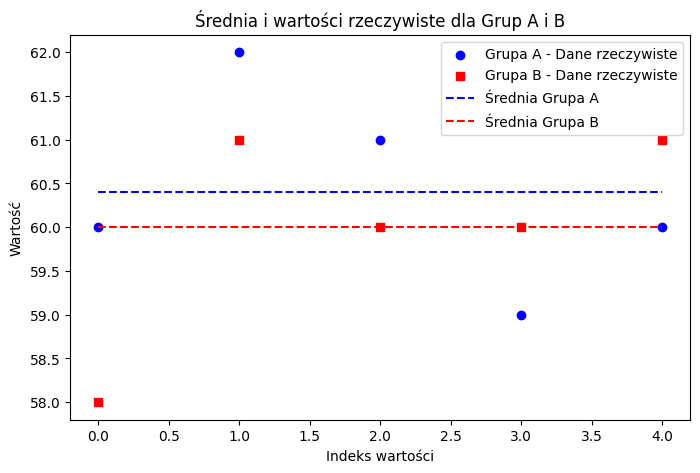

In [ ]:
#Wariancja
import statistics

def calculate_variance(group):
  mean = statistics.mean(group)
  variance = sum((x - mean) ** 2 for x in group) / (len(group) - 1)
  return variance, mean

groupA = [60, 62, 61, 59, 60]
groupB = [58, 61, 60, 60, 61]


varianceA, meanA = calculate_variance(groupA)
varianceB, meanB = calculate_variance(groupB)

print(f"Wariancja grupy A {varianceA}")
print(f"Wariancja grupy B {varianceB}")


y_values_A = [mean_A] * len(groupA)
y_values_B = [mean_B] * len(groupB)


# Tworzenie wykresu
plt.figure(figsize=(8, 5))
x_values = list(range(len(groupA)))

# Scatter plot dla wartości grupy A i B
plt.scatter(x_values, groupA, color="blue", label="Grupa A - Dane rzeczywiste", marker="o")
plt.scatter(x_values, groupB, color="red", label="Grupa B - Dane rzeczywiste", marker="s")

# Wykres linii dla średnich
plt.plot(x_values, y_values_A, color="blue", linestyle="dashed", label="Średnia Grupa A")
plt.plot(x_values, y_values_B, color="red", linestyle="dashed", label="Średnia Grupa B")

# Opisy osi i tytuł
plt.xlabel("Indeks wartości")
plt.ylabel("Wartość")
plt.title("Średnia i wartości rzeczywiste dla Grup A i B")

# Legenda
plt.legend()
plt.show()

In [ ]:
def correlation(x, y):

    #Obliczamy średnią wartość dla zmiennej x i y
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    #Obliczamy licznik - sumę iloczynów różnic wartości dla zmiennych x i y oraz ich średnich
    numenator = 0

    for value_x, value_y in zip(x, y):
      numenator += (value_x - mean_x) * (value_y - mean_y)

    #Obliczamy mianownik - pierwiastek z  iloczynu sumy  kwadratów różnic wartości X od średniej X i  sumy kwadratów różnic wartości Y od średniej Y
    denominator_x = 0
    denominator_y = 0

    for value_x, value_y in zip(x, y):
      denominator_x += (value_x - mean_x) ** 2
      denominator_y += (value_y - mean_y) ** 2

    denominator = (denominator_x * denominator_y  ) ** 0.5

    correlation = numenator / denominator
    return correlation


temperature = [10, 12, 14, 16, 18, 20, 22, 24, 26]
sold_ice_creams = [20, 30, 40, 80, 90, 50, 130, 160, 200]

# Obliczenie korelacji
r_value = correlation(temperature, sold_ice_creams)
print(f"Współczynnik korelacji: {r_value:.2f}")

Współczynnik korelacji: 0.92


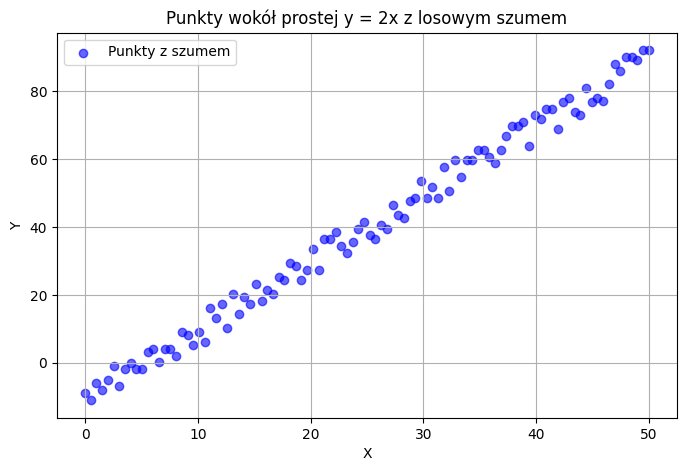

In [ ]:
#Regresja liniowa

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ustawienie generatora liczb losowych dla powtarzalności wyników
np.random.seed(42)

# Generowanie 100 punktów x w zakresie od 0 do 50
X = np.linspace(0, 50, 100)

# Tworzenie wartości y = 2x z losowym szumem (zakres -5 do 5)
noise = np.random.randint(-5, 5, 100)  # Szum losowy
Y = 2 * X - 10 + noise

# Rysowanie wykresu
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label="Punkty z szumem", alpha=0.6)

# Opisy wykresu
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Punkty wokół prostej y = 2x z losowym szumem")
plt.legend()
plt.grid()

# Wyświetlenie wykresu
plt.show()

# Utworzenie dataframe i zapis do pliku
df = pd.DataFrame({'X': X, 'Y': Y})
df.to_csv('points.csv', index=False)


In [ ]:
#Funkcja wyznaczająca krzywą regresji

def regression(x,y):
  sum_of_xy = 0
  sum_x = 0
  sum_y = 0
  sum_x_squared = 0
  n = len(x)

  for x_value, y_value in zip(x,y):
    sum_of_xy += x_value * y_value
    sum_x += x_value
    sum_y += y_value
    sum_x_squared += x_value ** 2


  a = (n*sum_of_xy - sum_x * sum_y) / (n*sum_x_squared - sum_x ** 2)
  b = (sum_y - a * sum_x) / n

  return a, b

print(regression(X,Y))

(2.0169544554455414, -10.513861386138528)


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X_array = np.array(X).reshape(-1, 1)  # Sklearn wymaga 2D tablicy
Y_array = np.array(Y)  # Sklearn wymaga 2D tablicy


model = LinearRegression()
model.fit(X_array, Y_array)  # Trenowanie modelu

a = model.coef_[0]  # Nachylenie
b = model.intercept_  # Punkt przecięcia

print(f"Nachylenie a: {a}")
print(f"Punkt przecięcia b: {b}")


Nachylenie a: 2.0169544554455445
Punkt przecięcia b: -10.513861386138615


In [ ]:
#Regresja w praktyce
from sklearn.linear_model import LinearRegression
import numpy as np

#1 Przetasowanie wartości
np.random.seed(42)
shuffled_indices = np.random.permutation(len(X))

# Przetasowanie X i Y zgodnie z tymi samymi indeksami
X_shuffled = X[shuffled_indices]
Y_shuffled = Y[shuffled_indices]

#2 Usunięcie 20% wartości i zapis ich do dataframe
split_point = int(0.8 * len(X_shuffled))

X_train = X_shuffled[:split_point]
Y_train = Y_shuffled[:split_point]
X_removed = X_shuffled[split_point:]
Y_removed = Y_shuffled[split_point:]

df_removed = pd.DataFrame({'X': X_removed, 'Y_rzeczywiste': Y_removed})

#3 Regresja liniowa na pozostałych danych

model = LinearRegression()
model.fit(X_array, Y_array)  # Trenowanie modelu

a = model.coef_[0]  # Nachylenie
b = model.intercept_  # Punkt przecięcia

print(f"Nachylenie a: {a}")
print(f"Punkt przecięcia b: {b}")

#4 Przewidywanie brakujących wartości Y i zapisanie ich do dataframe
df_removed["Y_prognozowane"] = a * df_removed["X"] + b

#5 Wyświetl dataframe
print(df_removed)


Nachylenie a: 2.0169544554455445
Punkt przecięcia b: -10.513861386138615
            X  Y_rzeczywiste  Y_prognozowane
0   31.818182      57.636364       53.661962
1   42.424242      76.848485       75.053903
2   18.686869      28.373737       27.176702
3   14.646465      17.292929       19.027391
4    0.505051     -10.989899       -9.495198
5   26.262626      40.525253       42.456660
6   10.606061       6.212121       10.878080
7    1.010101      -5.979798       -8.476534
8   11.616162      13.232323       12.915408
9   43.939394      72.878788       78.109895
10  45.959596      76.919192       82.184550
11  37.373737      66.747475       64.867265
12  43.434343      73.868687       77.091231
13  41.414141      74.828283       73.016576
14  10.101010       9.202020        9.859416
15  30.303030      48.606061       50.605971
16  35.858586      60.717172       61.811273
17   7.070707       4.141414        3.747433
18  46.464646      81.929293       83.203214
19  25.757576      36.51515

In [ ]:
#Zad 1
import pandas as pd

df = pd.read_json('sample_data/anscombe.json')
df

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.81


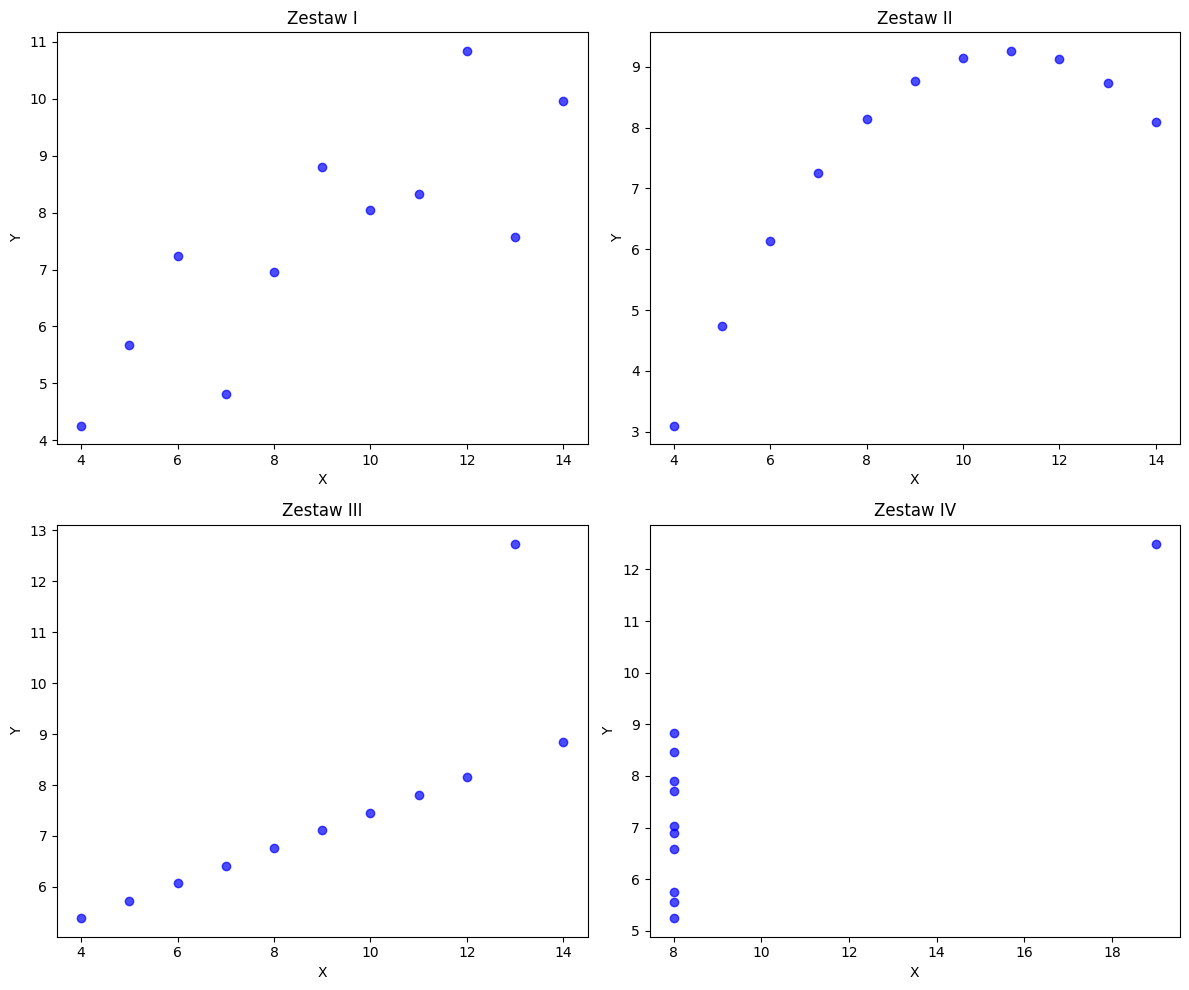

In [ ]:
#zad 2
import matplotlib.pyplot as plt

series_list = sorted(set(df["Series"]))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i in range(len(series_list)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    subset = df[df["Series"] == series_list[i]]

    ax.scatter(subset["X"], subset["Y"], color='blue', alpha=0.7)
    ax.set_title(f"Zestaw {series_list[i]}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

plt.tight_layout()
plt.show()

In [ ]:
#zad 3
import pandas as pd
import numpy as np

stats_df = df.groupby("Series").agg(
    Srednia_X=("X", "mean"),
    Srednia_Y=("Y", "mean"),
    Wariancja_X=("X", "var"),
    Wariancja_Y=("Y", "var"),
    Mediana_X=("X", "median"),
    Mediana_Y=("Y", "median"),
    Moda_X=("X", lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    Moda_Y=("Y", lambda y: y.mode().iloc[0] if not y.mode().empty else np.nan)
).reset_index()

print(stats_df)

  Series  Srednia_X  Srednia_Y  Wariancja_X  Wariancja_Y  Mediana_X  \
0      I        9.0   7.500000         11.0     4.132640        9.0   
1     II        9.0   7.500909         11.0     4.127629        9.0   
2    III        9.0   7.500000         11.0     4.122620        9.0   
3     IV        9.0   7.500909         11.0     4.123249        8.0   

   Mediana_Y  Moda_X  Moda_Y  
0       7.58       4    4.26  
1       8.14       4    3.10  
2       7.11       4    5.39  
3       7.04       8    5.25  


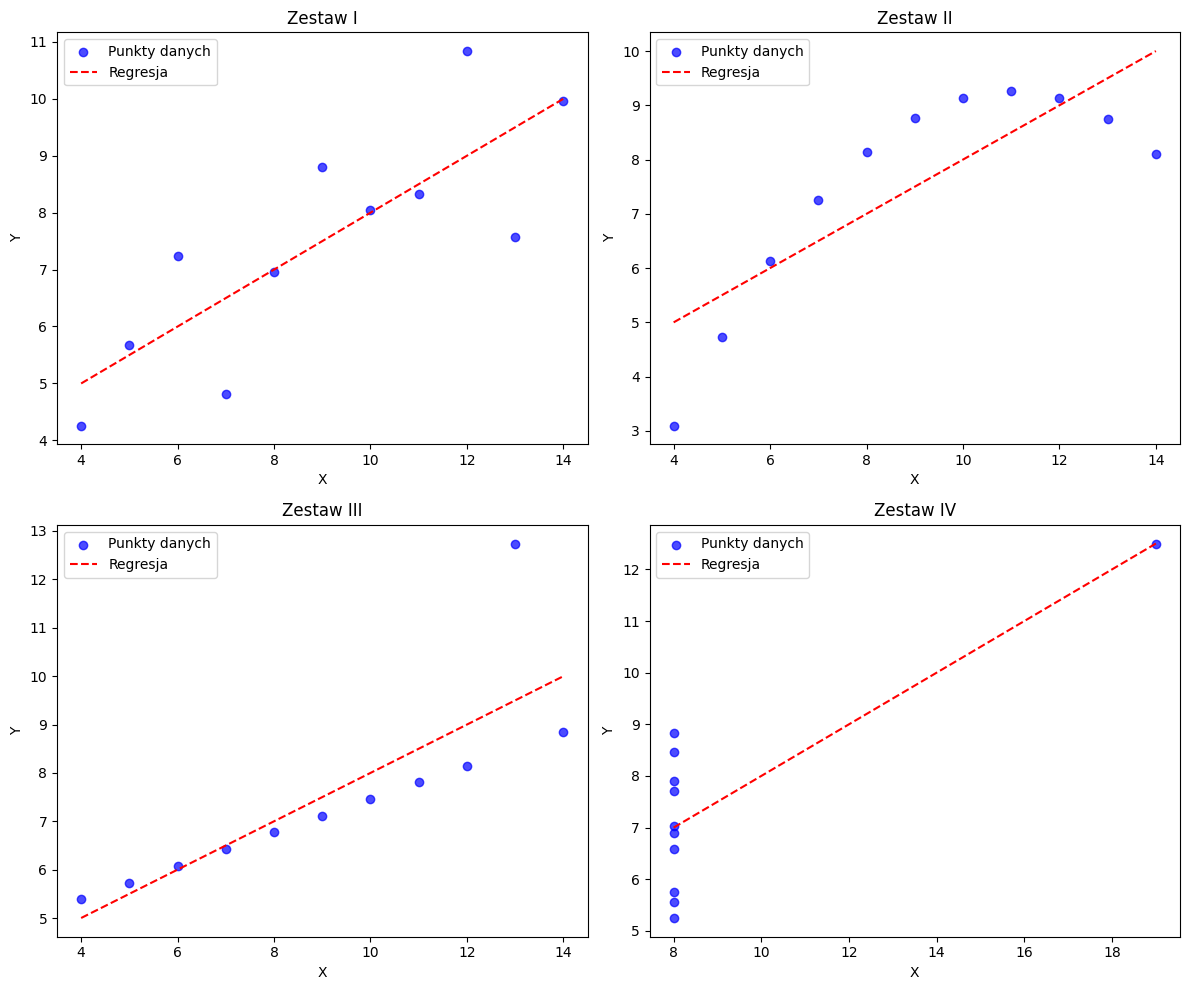

In [ ]:
#zad 4
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

series_list = sorted(set(df["Series"]))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i in range(len(series_list)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    series = series_list[i]
    subset = df[df["Series"] == series]
    X = subset["X"].values.reshape(-1, 1)
    Y = subset["Y"].values

    model = LinearRegression()
    model.fit(X, Y)

    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    Y_pred = model.predict(X_range)

    ax.scatter(subset["X"], subset["Y"], color='blue', alpha=0.7, label="Punkty danych")
    ax.plot(X_range, Y_pred, color="red", linestyle="dashed", label="Regresja")
    ax.set_title(f"Zestaw {series}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

plt.tight_layout()
plt.show()

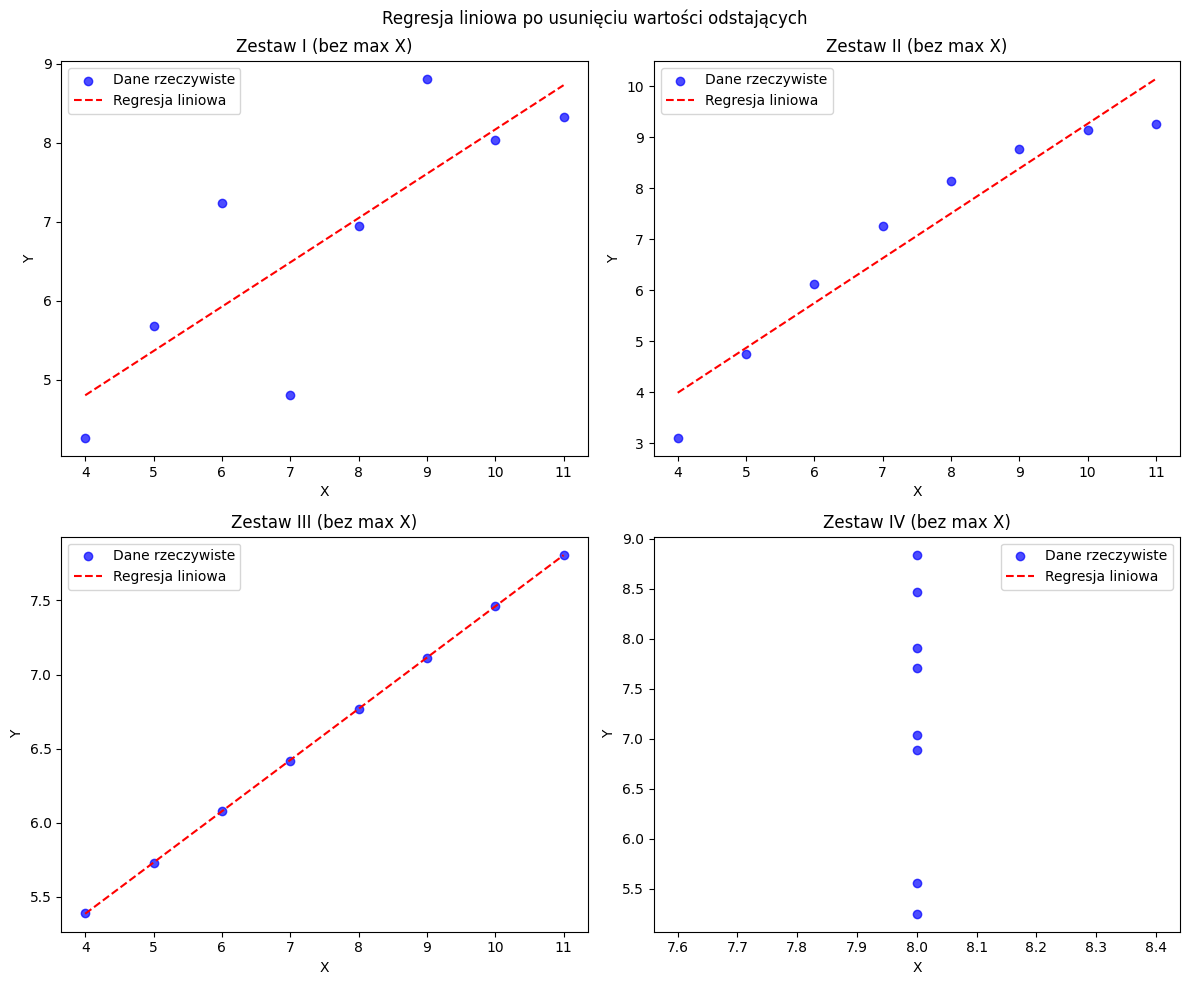

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Modyfikacja - usuniecie ostatniej wartości (pamiętajmy że indeksy są przetasowane)
df = df.loc[~df.index.isin(df.groupby("Series")["X"].idxmax())]
df = df.loc[~df.index.isin(df.groupby("Series")["X"].idxmax())]

series_list = sorted(set(df["Series"]))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i in range(len(series_list)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    series = series_list[i]
    subset = df[df["Series"] == series]
    X = subset["X"].values.reshape(-1, 1)
    Y = subset["Y"].values

    model = LinearRegression()
    model.fit(X, Y)

    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    Y_pred = model.predict(X_range)

    ax.scatter(subset["X"], subset["Y"], color='blue', alpha=0.7, label="Dane rzeczywiste")
    ax.plot(X_range, Y_pred, color="red", linestyle="dashed", label="Regresja liniowa")

    ax.set_title(f"Zestaw {series} (bez max X)")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

plt.suptitle("Regresja liniowa po usunięciu wartości odstających")
plt.tight_layout()
plt.show()